### Titanik_v2.0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
trainDF = pd.read_csv(r'C:\Data\Илья\python\Kaggle\Titanic Learn from disaster\train.csv')
testDF = pd.read_csv(r'C:\Data\Илья\python\Kaggle\Titanic Learn from disaster\test.csv')
combine = [trainDF, testDF]

In [3]:
#Dataset Informations:
# Survived (0 = No; 1 = Yes)
# class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
# sibsp - Number of Siblings/Spouses Aboard
# parch - Number of Parents/Children Aboard
# ticket - Ticket Number
# fare - Passenger Fare
# embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [4]:
trainDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
## Функция для построения графиков
#def Titanic_plot(df, ind, val='PassengerId', cols='Survived', agf='count'):
#
#    pv = df.pivot_table(values=val, index=ind, columns=cols, aggfunc=agf) #, margins=True)
#    pv.fillna(0, inplace=True)
#    nam = pv.index.unique()
#    table = [([nam[n],(pv.iloc[0,n]/(pv.iloc[0,n]+pv.iloc[1,n])),(pv.iloc[1,n]/(pv.iloc[0,n]+pv.iloc[1,n]))]) for n in range(len(pv))]
#    ct = pd.DataFrame(table, columns = [ind, 'Died','Survived'])
#    xt = ct.iloc[:, 1:]
#
#    ct.plot(x = ind, kind = 'barh', stacked = True, title = 'Percentage of Died/Survived by '+ ind, mark_right = True)
#    for n in xt: 
#        for i, (cs, ab, val) in enumerate( zip(xt.cumsum(1)[n], ct[n] , xt[n])): 
#            plt.text(cs-ab/2 , i, str(np.round(val*100, 1)) + '%', va = 'center', ha = 'center')
#    plt.gca().invert_yaxis()

In [6]:
# Функция для построения графиков
def Titanic_plot(df, ind, val='PassengerId', cols='Survived', agf='count'):

    pv = df.pivot_table(values=val, index=ind, columns=cols, aggfunc=agf) #, margins=True)
    pv.fillna(0, inplace=True)
    nam = pv.index.unique()
    table = [([nam[n],(pv[0][n]/(pv[0][n]+pv[1][n])),(pv[1][n]/(pv[0][n]+pv[1][n]))]) for n in range(len(pv))]
    ct = pd.DataFrame(table, columns = [ind, 'Died','Survived'])
    xt = ct.iloc[:, 1:]

    ct.plot(x = ind, kind = 'barh', stacked = True, title = 'Percentage of Died/Survived by '+ ind, mark_right = True)
    for n in xt: 
        for i, (cs, ab, val) in enumerate( zip(xt.cumsum(1)[n], ct[n] , xt[n])): 
            plt.text(cs-ab/2 , i, str(np.round(val*100, 1)) + '%', va = 'center', ha = 'center')
    plt.gca().invert_yaxis()

In [7]:
trainDF.info()
print('_'*40)
testDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [8]:
trainDF.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Johnson, Mr. William Cahoone Jr",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


### Analyze by visualizing data

###### Correlating numerical features

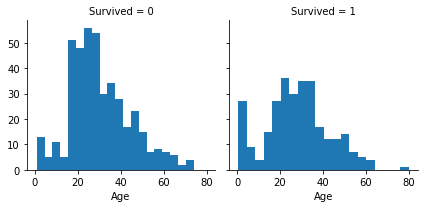

In [9]:
g = sns.FacetGrid(trainDF, col='Survived')
g.map(plt.hist, 'Age', bins=20)

###### Correlating numerical and ordinal features

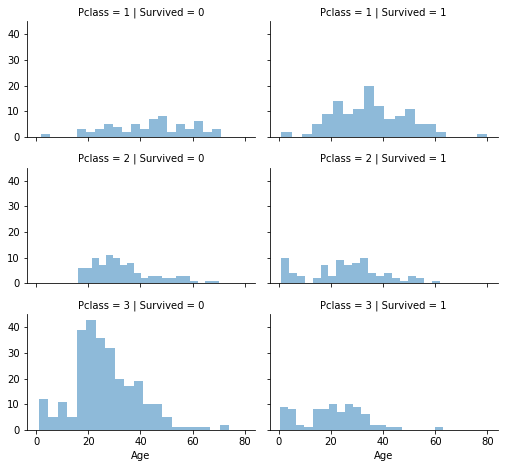

In [10]:
grid = sns.FacetGrid(trainDF, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

###### Correlating categorical features

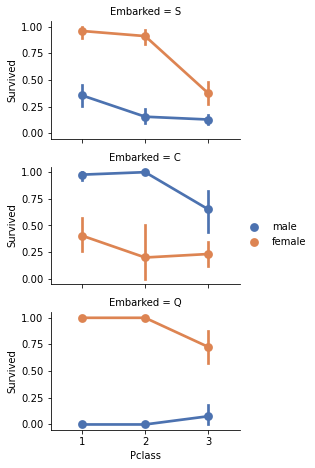

In [11]:
grid = sns.FacetGrid(trainDF, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

###### Correlating categorical and numerical features

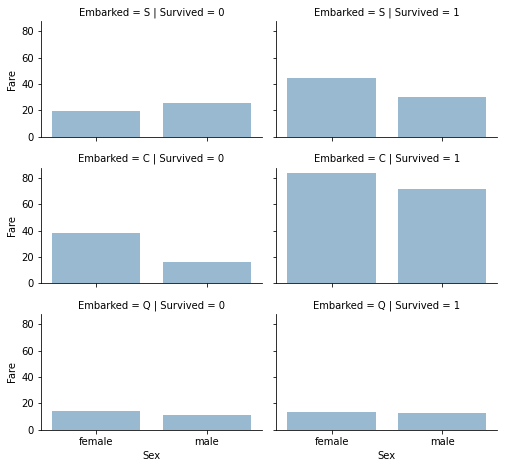

In [12]:
grid = sns.FacetGrid(trainDF, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

### Correcting by dropping features №1

In [13]:
print("Before", trainDF.shape, testDF.shape, combine[0].shape, combine[1].shape)

trainDF = trainDF.drop(['Ticket', 'Cabin', 'Name'], axis=1)
testDF = testDF.drop(['Ticket', 'Cabin', 'Name'], axis=1)
combine = [trainDF, testDF]

print("After", trainDF.shape, testDF.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 9) (418, 8) (891, 9) (418, 8)


### Convert Sex to 1-0

In [14]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

trainDF.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


### Completing a numerical continuous feature

In [15]:
trainDF['Embarked'] = trainDF['Embarked'].fillna('S')

In [16]:
testDF['Fare'] = testDF['Fare'].fillna(np.mean(testDF['Fare']))

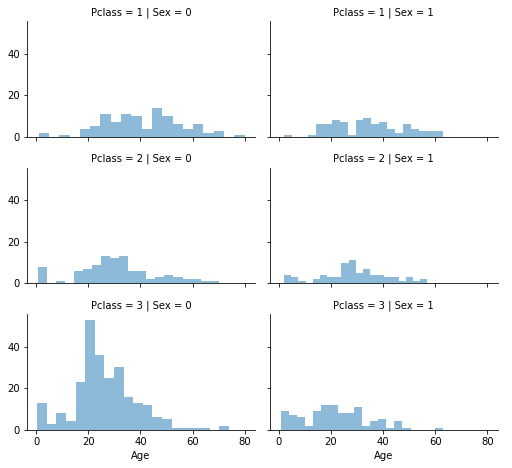

In [17]:
grid = sns.FacetGrid(trainDF, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [18]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [19]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guessDF = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guessDF.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

trainDF.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22,1,0,7.2500,S
1,2,1,1,1,38,1,0,71.2833,C
2,3,1,3,1,26,0,0,7.9250,S
3,4,1,1,1,35,1,0,53.1000,S
4,5,0,3,0,35,0,0,8.0500,S


In [20]:
trainDF.info()
print('_'*40)
testDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    int32  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(1), int32(2), int64(5), object(1)
memory usage: 55.8+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   A

### Exploratory data analysis (EDA) 

### 1. Age

In [21]:
#Юность (0—19 лет)
#Молодость (от 19 до 35[8]-39[9] лет) — начало зрелости, период ухаживания и ранние годы семейной жизни, годы до начала среднего возраста
#Взрослость, зрелость (от 35-39 до 60 лет) — период, когда человек прочно связывает себя с определенным родом занятий, а его дети становятся подростками
#Старость (от 60 лет) 

def AgingShort(years):
    if years<=19:
        return '1'
    elif years<=39:
        return '2'
    elif years<=60:
        return '3'
    return '4'

In [22]:
trainDF['Age_short'] = trainDF['Age'].apply(AgingShort)
testDF['Age_short'] = testDF['Age'].apply(AgingShort)

trainDF.groupby('Age_short').agg('count')['PassengerId']

Age_short
1    164
2    543
3    162
4     22
Name: PassengerId, dtype: int64

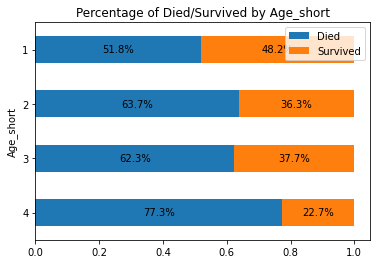

In [23]:
Titanic_plot(trainDF, 'Age_short')

### 2. Sex

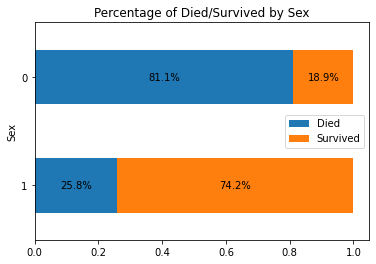

In [24]:
Titanic_plot(trainDF, 'Sex')

### 3. PassengerClass / FirstClass?

In [25]:
def FirstClassDef(passclass):
    if passclass==1:
        return '1' # FirstClass
    return '0' #Others

In [26]:
trainDF['First'] = trainDF['Pclass'].apply(FirstClassDef)
testDF['First'] = testDF['Pclass'].apply(FirstClassDef)

trainDF.groupby('First').agg('count')['PassengerId']

First
0    675
1    216
Name: PassengerId, dtype: int64

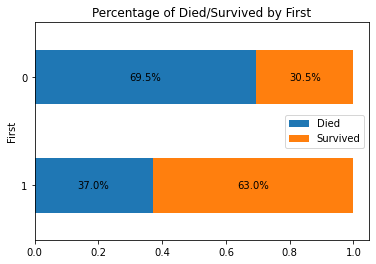

In [27]:
Titanic_plot(trainDF, 'First')

### 4. Port of Embarkation (Embarked)

In [28]:
trainDF['Embarked'] = trainDF['Embarked'].map( {'C': 1, 'Q': 2, 'S': 3} )
testDF['Embarked'] = testDF['Embarked'].map( {'C': 1, 'Q': 2, 'S': 3} )
trainDF.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_short,First
0,1,0,3,0,22,1,0,7.2500,3,2,0
1,2,1,1,1,38,1,0,71.2833,1,2,1
2,3,1,3,1,26,0,0,7.9250,3,2,0
3,4,1,1,1,35,1,0,53.1000,3,2,1
4,5,0,3,0,35,0,0,8.0500,3,2,0


In [29]:
#Titanic_plot(trainDF, 'Embarked')

### 5. SibSp & Parch / Alone?

In [30]:
trainDF['Family'] = trainDF['SibSp']+trainDF['Parch']
testDF['Family'] = testDF['SibSp']+testDF['Parch']

In [31]:
def WalkAlone(qty):
    if qty==0:
        return '1' #walk_alone
    return '0' #has_family

In [32]:
trainDF['Alone'] = trainDF['Family'].apply(WalkAlone)
testDF['Alone'] = testDF['Family'].apply(WalkAlone)

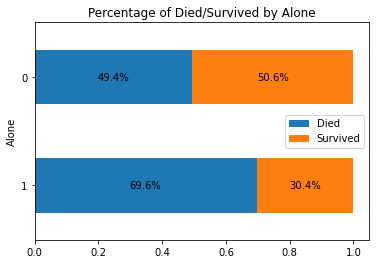

In [33]:
Titanic_plot(trainDF, 'Alone')

### 6. Fare (цена за билет)

In [34]:
trainDF['FareBand'] = pd.qcut(trainDF['Fare'], 4)
trainDF[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [35]:
def Fares(ff):
    if ff<=8:
        return '1' #low fare
    elif ff<=15:
        return '2' #mid fare
    elif ff<=31:
        return '3' #high fare
    return '4' #extra fare

In [36]:
trainDF['FareLvl'] = trainDF['Fare'].apply(Fares)
testDF['FareLvl'] = testDF['Fare'].apply(Fares)

In [43]:
trainDF.drop("FareBand", axis=1, inplace =True)

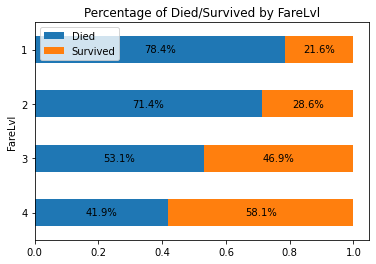

In [44]:
Titanic_plot(trainDF, 'FareLvl')

In [65]:
ntrain = trainDF.shape[0]  # нужно для того чтобы после преобразований разделить all_data обратно на train & test

y_train = trainDF.Survived

all_data = pd.concat((trainDF, testDF)).reset_index(drop=True)
all_data.drop(['Survived'], axis=1, inplace=True)

print("all_data size is : {}".format(all_data.shape))

AttributeError: 'DataFrame' object has no attribute 'Survived'

In [48]:
#display(trainDF.head())
#display(trainDF.shape)
#display(testDF.head())
#display(testDF.shape)
display(all_data.head())
display(all_data.shape)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_short,First,Family,Alone,FareLvl
0,1,3,0,22,1,0,7.2500,3,2,0,1,0,1
1,2,1,1,38,1,0,71.2833,1,2,1,1,0,4
2,3,3,1,26,0,0,7.9250,3,2,0,0,1,1
3,4,1,1,35,1,0,53.1000,3,2,1,1,0,4
4,5,3,0,35,0,0,8.0500,3,2,0,0,1,2


(1309, 13)

In [50]:
all_data.drop(['Age', 'Fare','PassengerId','First', 'Family','SibSp', 'Parch'], axis=1, inplace = True)

In [51]:
display(all_data.head())
display(all_data.shape)

,Pclass,Sex,Embarked,Age_short,Alone,FareLvl
0,3,0,3,2,0,1
1,1,1,1,2,0,4
2,3,1,3,2,1,1
3,1,1,3,2,0,4
4,3,0,3,2,1,2


(1309, 6)

In [59]:
all_data.Pclass = all_data.Pclass.astype('str')
all_data.Sex = all_data.Sex.astype('str')
all_data.Embarked = all_data.Embarked.astype('str')

In [60]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Pclass     1309 non-null   object
 1   Sex        1309 non-null   object
 2   Embarked   1309 non-null   object
 3   Age_short  1309 non-null   object
 4   Alone      1309 non-null   object
 5   FareLvl    1309 non-null   object
dtypes: object(6)
memory usage: 61.5+ KB


In [61]:
df = pd.get_dummies(all_data, drop_first=True)
display(df.head())
display(df.shape)

,Pclass_2,Pclass_3,Sex_1,Embarked_2,Embarked_3,Age_short_2,Age_short_3,Age_short_4,Alone_1,FareLvl_2,FareLvl_3,FareLvl_4
0,0,1,0,0,1,1,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,0,1
2,0,1,1,0,1,1,0,0,1,0,0,0
3,0,0,1,0,1,1,0,0,0,0,0,1
4,0,1,0,0,1,1,0,0,1,1,0,0


(1309, 12)

In [66]:
X_train = df[:ntrain]
X_test = df[ntrain:]
Y_train = y_train

display("X_train shape is {}".format(X_train.shape))
display("X_test shape is {}".format(X_test.shape))

'X_train shape is (891, 12)'

'X_test shape is (418, 12)'

### Modelling!

Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

Logistic Regression  
KNN or k-Nearest Neighbors  
Support Vector Machines  
Naive Bayes classifier  
Decision Tree  
Random Forrest  
Perceptron  
Artificial neural network  
RVM or Relevance Vector Machine

In [64]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [67]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.7

In [68]:
coeff_df = pd.DataFrame(trainDF.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
2,Embarked_2,2.471525
10,FareLvl_4,0.237943
8,FareLvl_2,0.116428
3,Embarked_3,-0.118944
9,FareLvl_3,-0.198575
5,Age_short_3,-0.424599
4,Age_short_2,-0.531865
0,Pclass_3,-0.741686
6,Age_short_4,-1.059070
7,Alone_1,-1.172793


In [69]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.84

In [70]:
#k-Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.51

In [71]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

74.3

In [72]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

66.55

In [73]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.57

In [74]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

73.06

In [75]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.97

In [76]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.97

In [77]:
from tqdm.notebook import tqdm

In [87]:
n_estimators = [10, 20, 30, 40]

for i in tqdm(n_estimators):
    random_forest = RandomForestClassifier(n_estimators=i)
    random_forest.fit(X_train, Y_train)
    train_score = random_forest.score(X_train, Y_train)
    print("Tree: {}, R2 = {}".format(i, acc))

Tree: 10, R2 = 0.8552188552188552
Tree: 20, R2 = 0.8597081930415263
Tree: 30, R2 = 0.8597081930415263
Tree: 40, R2 = 0.8597081930415263



In [119]:
from sklearn.metrics import mean_squared_error
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [126]:
random_forest = RandomForestClassifier(n_estimators=20)
random_forest.fit(X_train, Y_train)

base_predict = random_forest.predict(X_test)
base_y_train_predict = random_forest.predict(X_train)

base_train_score = random_forest.score(X_train, Y_train)
base_test_score = random_forest.score(X_test, base_predict)

base_rmsle_result = rmsle(base_y_train_predict, y_train)

In [127]:
print("train_score: {}".format(base_train_score))
print("test_score: {}".format(base_test_score))
print("RootMSE: {}".format(rmsle_result)) 

train_score: 0.8597081930415263
test_score: 1.0
RootMSE: 0.4303314829119352


In [118]:
submission3 = pd.DataFrame({
        "PassengerId": tst["PassengerId"],
        "Survived": base_predict})
submission3.to_csv(r'C:\Data\Илья\python\Kaggle\Titanic Learn from disaster/My_submission_3.csv', index=False)

# Optimization

### Round 1

In [88]:
from sklearn.model_selection import RandomizedSearchCV

rfc = RandomForestClassifier()

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rfc, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train, Y_train)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.7min finished


{'n_estimators': 400,
 'min_samples_split': 23,
 'min_samples_leaf': 12,
 'max_features': 'sqrt',
 'max_depth': 11,
 'bootstrap': True}

In [110]:
rs.best_params_

{'n_estimators': 400,
 'min_samples_split': 23,
 'min_samples_leaf': 12,
 'max_features': 'sqrt',
 'max_depth': 11,
 'bootstrap': True}

In [123]:
y_pred_rs = rs.best_estimator_.predict(X_test)
y_train_predict_rs = rs.best_estimator_.predict(X_train)

rs_train_score = rs.best_estimator_.score(X_train, Y_train)
rs_test_score = rs.best_estimator_.score(X_test, y_pred_rs)

rmsle_result_rs = rmsle(y_train_predict_rs, y_train)

In [124]:
print("train_score: {}".format(rs_train_score))
print("test_score: {}".format(rs_test_score))
print("RootMSE: {}".format(rmsle_result_rs)) 

train_score: 0.8148148148148148
test_score: 1.0
RootMSE: 0.4303314829119352


In [89]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,700,23,12,sqrt,8,True,0.803591,1
1,400,23,12,sqrt,11,True,0.803591,1
2,800,28,12,sqrt,14,True,0.802469,3
3,600,50,2,sqrt,7,False,0.801347,4
4,700,23,7,log2,15,False,0.800224,5
5,200,12,2,log2,4,True,0.800224,5
6,700,2,2,log2,11,True,0.800224,5
7,700,12,2,sqrt,13,False,0.800224,5
8,300,28,7,log2,13,True,0.799102,9
9,500,18,7,log2,7,True,0.795735,10


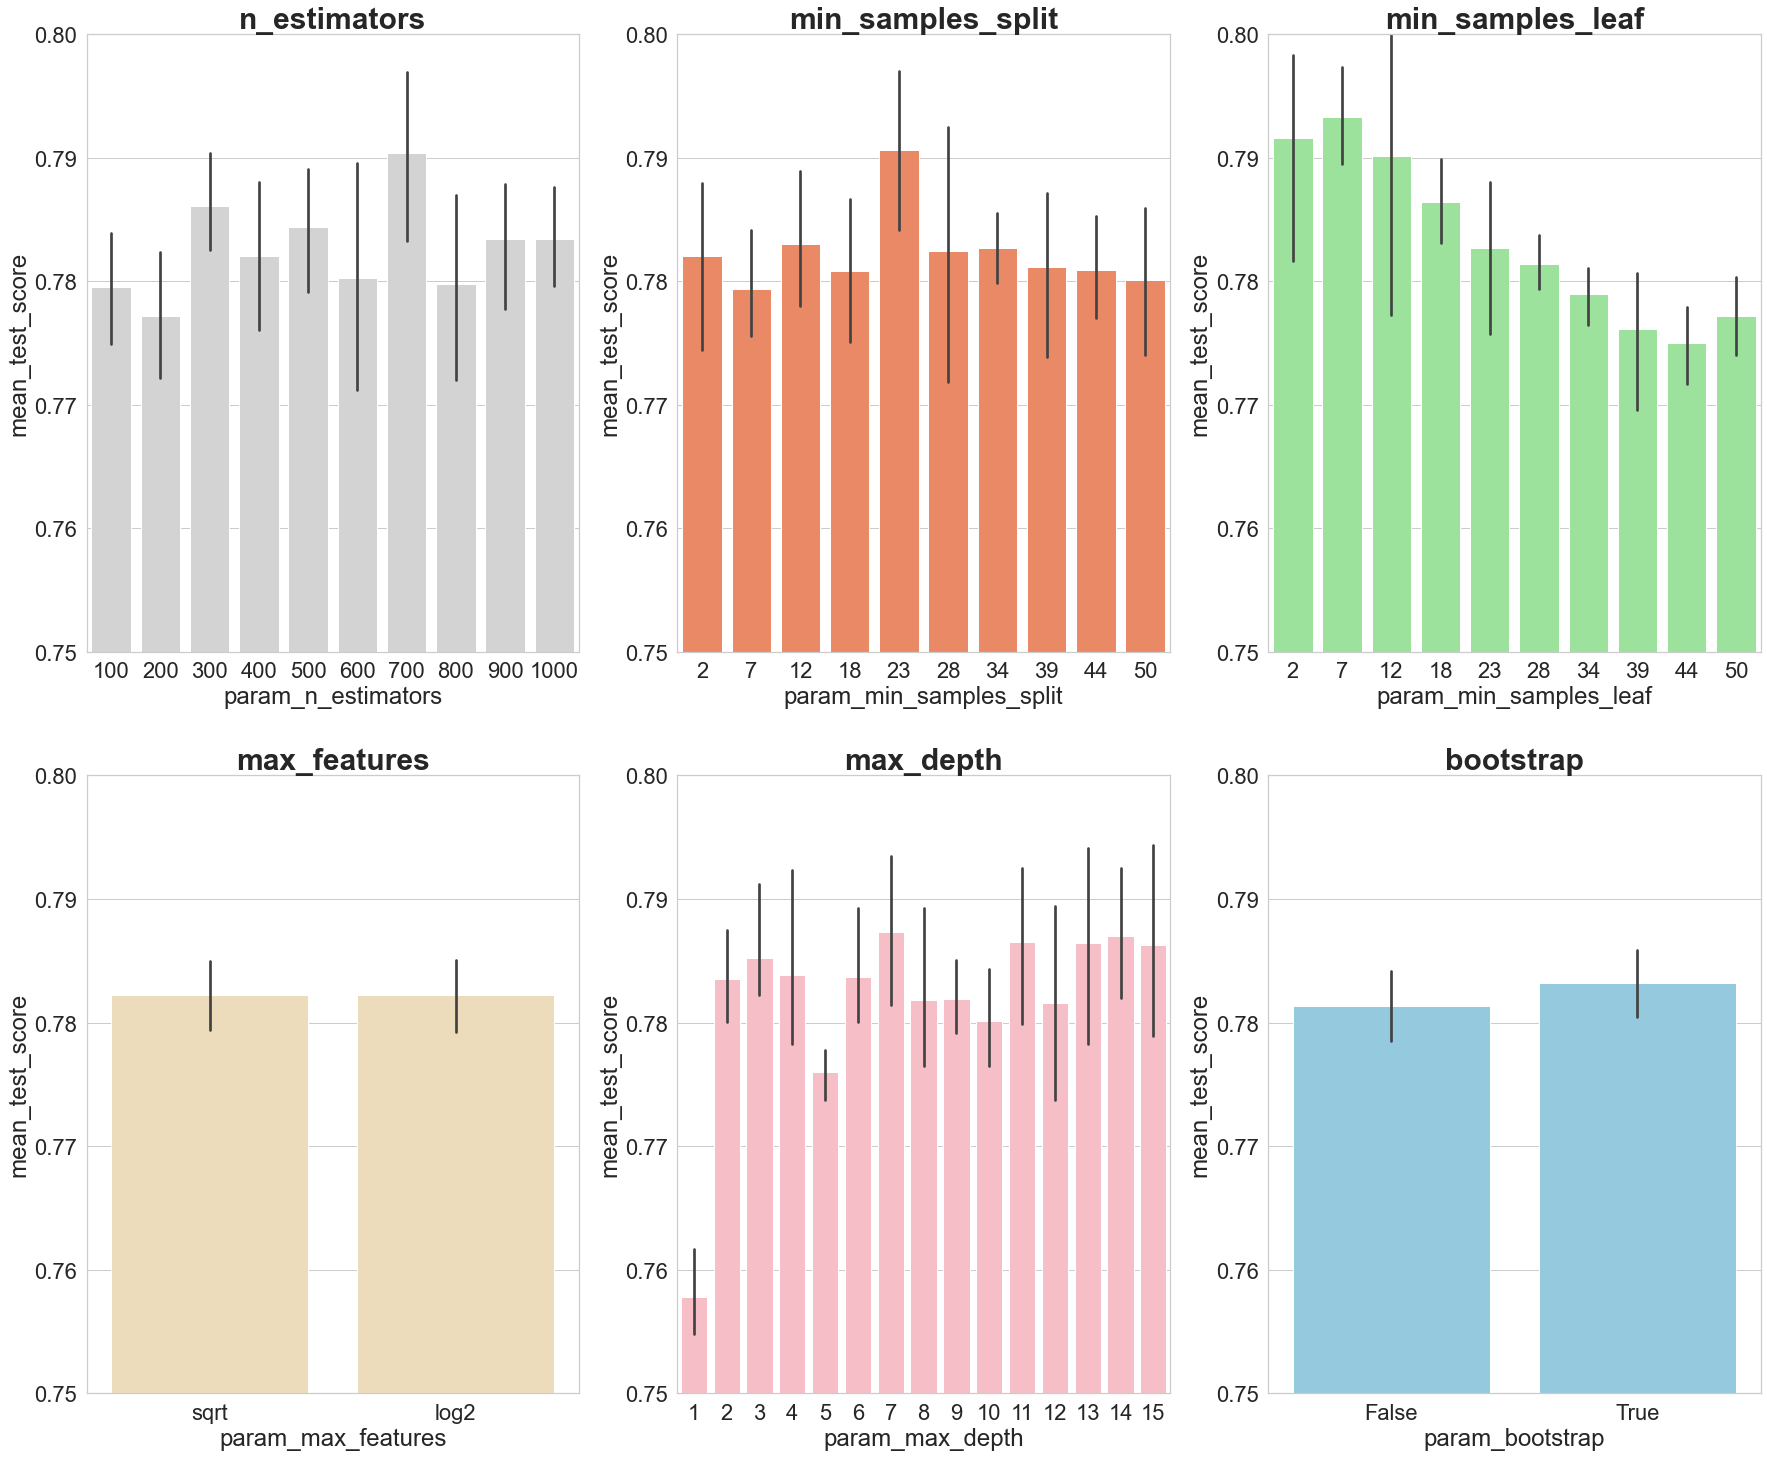

In [98]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)

sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.75,.80])
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')

sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.75,.80])
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')

sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.75,.80])
axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')

sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.75,.80])
axs[1,0].set_title(label = 'max_features', size=30, weight='bold')

sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.75,.80])
axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')

sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.75,.80])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
plt.show()

### Round 2

###### Диапазоны параметров для исследования во 2м раунде выбраны на основании графиков выше!

In [101]:
from sklearn.model_selection import GridSearchCV
n_estimators = [300,500,700]
max_features = ['sqrt']
max_depth = [7,11,13,14,15]
min_samples_split = [21,22,23,24,25]
min_samples_leaf = [2,3,4,5,6,7,8,9]
bootstrap = [True]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(rfc, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(X_train, Y_train)
rfc_3 = gs.best_estimator_
gs.best_params_

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 17.9min finished


{'bootstrap': True,
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 7,
 'min_samples_split': 21,
 'n_estimators': 500}

In [106]:
gs.best_params_

{'bootstrap': True,
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 7,
 'min_samples_split': 21,
 'n_estimators': 500}

In [120]:
y_pred_gs = gs.best_estimator_.predict(X_test)
y_train_predict = gs.best_estimator_.predict(X_train)

train_score = gs.best_estimator_.score(X_train, Y_train)
test_score = gs.best_estimator_.score(X_test, y_pred_gs)

rmsle_result = rmsle(y_train_predict, y_train)

In [122]:
print("train_score: {}".format(train_score))
print("test_score: {}".format(test_score))
print("RootMSE: {}".format(rmsle_result)) 

train_score: 0.8148148148148148
test_score: 1.0
RootMSE: 0.4303314829119352


In [115]:
tst =pd.read_csv(r'C:\Data\Илья\python\Kaggle\Titanic Learn from disaster\test.csv')

In [116]:
submission = pd.DataFrame({
        "PassengerId": tst["PassengerId"],
        "Survived": y_pred_gs })

In [117]:
submission.to_csv(r'C:\Data\Илья\python\Kaggle\Titanic Learn from disaster/My_submission_2.csv', index=False)